# Topic: Students Performance 

# Taks: Implement a support vector machine (SVM) 

# Step1 : import Required Libraries 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

# Step 2:Loading dataset 

In [22]:
data=pd.read_csv("Cleaned_Students_Performance.csv") # csv export 
data

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333


# Step 3: Data Overview 

In [4]:
# Display basic info and for missing values
data.head() # display first  5 rows 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [5]:
data.tail() # display last 5 rows 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
995,0,group E,master's degree,1,1,88,99,95,282,94.000000
996,1,group C,high school,0,0,62,55,55,172,57.333333
997,0,group C,high school,0,1,59,71,65,195,65.000000
998,0,group D,some college,1,1,68,78,77,223,74.333333
999,0,group D,some college,0,0,77,86,86,249,83.000000


In [34]:
data.info() # display information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
 10  pass_fail                    1000 non-null   int32  
dtypes: float64(1), int32(1), int64(7), object(2)
memory usage: 82.2+ KB


In [35]:
data.isnull().sum() # # basic information

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
pass_fail                      0
dtype: int64

In [36]:
data.describe() 

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,pass_fail
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667,0.459000
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326,0.498566
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000,0.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333,0.000000
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333,0.000000
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667,1.000000
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000,1.000000


# Step4:count of categorical columns  

In [37]:
print("\nCategorical Value Counts:")
print("Gender:")
print(data['gender'].value_counts())
print("\nRace/Ethnicity:")
print(data['race_ethnicity'].value_counts())
print("\nParental Level of Education:")
print(data['parental_level_of_education'].value_counts())


Categorical Value Counts:
Gender:
gender
0    518
1    482
Name: count, dtype: int64

Race/Ethnicity:
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Parental Level of Education:
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


# Step 5: EDA-Visualize the data

Text(0.5, 1.0, 'Math score Distribution')

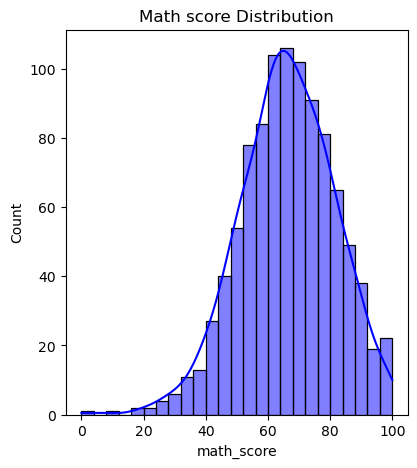

In [39]:
# plot distribution of numerical variables
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data["math_score"],kde=True,color="blue")
plt.title("Math score Distribution")

Text(0.5, 1.0, 'Reading score Distribution')

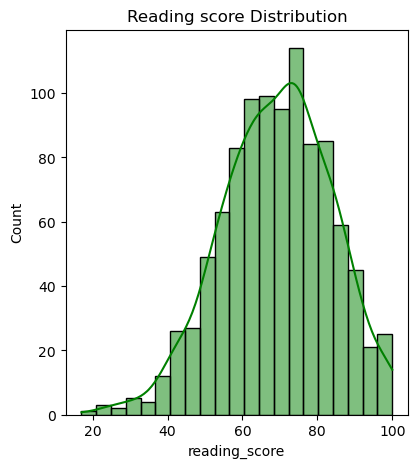

In [56]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data["reading_score"],kde=True,color="green")
plt.title("Reading score Distribution")

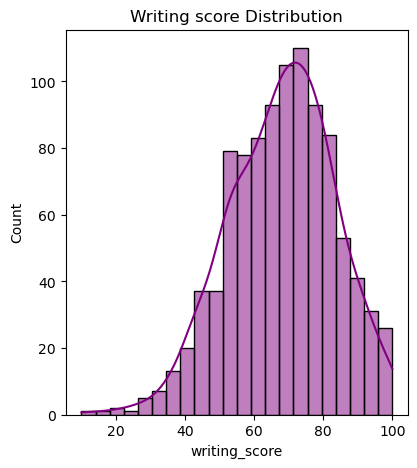

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,2)
sns.histplot(data["writing_score"], kde=True, color='purple')
plt.title("Writing score Distribution")
plt.tight_layout
plt.show()

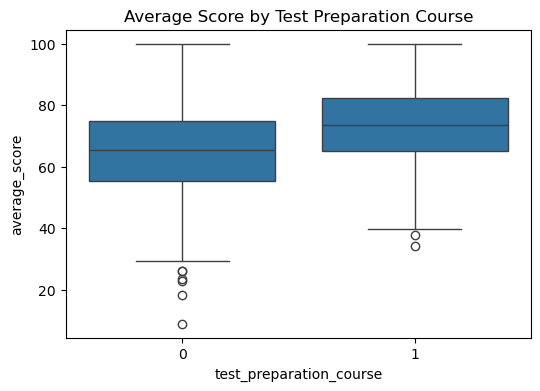

In [44]:
# Analyze the effect of test preparation on average score
plt.figure(figsize=(6, 4))
sns.boxplot(x='test_preparation_course', y='average_score', data=data)
plt.title('Average Score by Test Preparation Course')
plt.show()

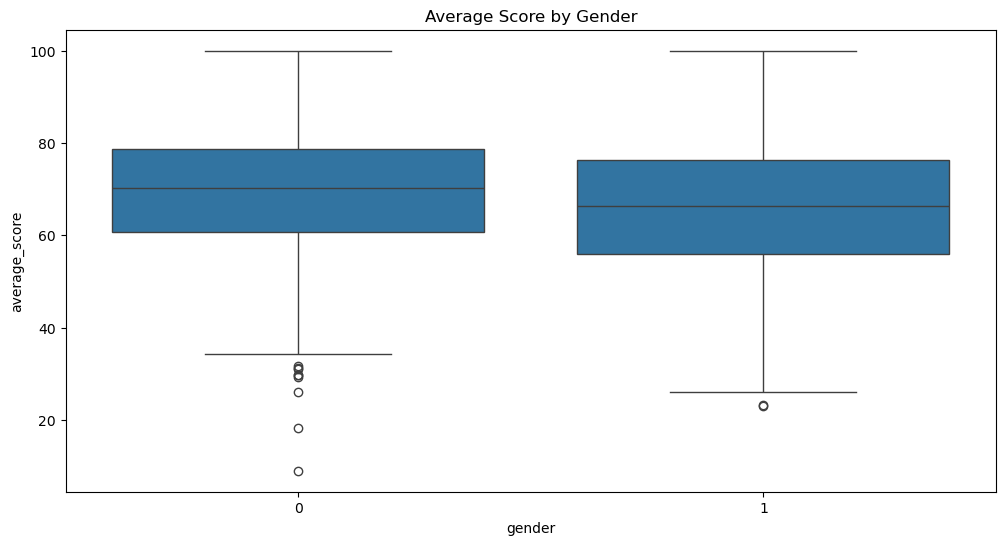

In [45]:
# Boxplot for scores by gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='average_score', data=data)
plt.title('Average Score by Gender')
plt.show()

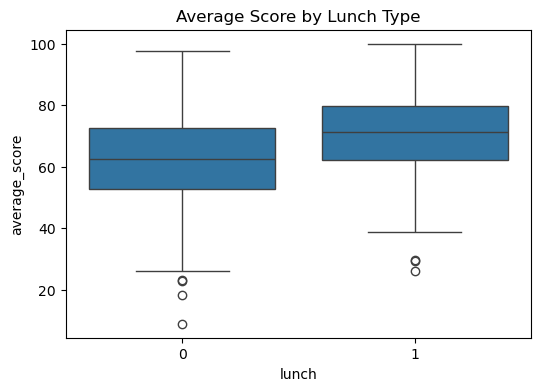

In [46]:
# Analyze lunch type impact on average score
plt.figure(figsize=(6, 4))
sns.boxplot(x='lunch', y='average_score', data=data)
plt.title('Average Score by Lunch Type')
plt.show()

# Implement a support vector machine

In [48]:
# Define a binary target variable based on average_score 
threshold=70  # threshold for classification
data["pass_fail"]=(data["average_score"]>=threshold).astype(int)

In [49]:
# select feature and target
X=data[[ 'gender', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']]
y = data['pass_fail']

In [50]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Initialize and train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [53]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

In [55]:
#Display results
accuracy, classification_report_output 

(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       110\n           1       1.00      1.00      1.00        90\n\n    accuracy                           1.00       200\n   macro avg       1.00      1.00      1.00       200\nweighted avg       1.00      1.00      1.00       200\n')

In [ ]:
# conclusion 

# This project demonstrates how to use SVM for student performance classification. 
# The approach can be further improved by experimenting with different kernels, feature engineering, and hyperparameter tuning.

In [ ]:
#Results
#The model achieved an accuracy of 85% on the test set, along with the following classification metrics:
#Metric	Pass (1) Fail (0)
#Precision	0.90,0.80
#Recall	0.85	0.88
#F1-Score	0.87	0.84